<img src = "https://evangsmailoa.files.wordpress.com/2019/09/ml.png"  align = "center">

#<center>Decision Trees</center>
Kali ini kita akan lakukan klasifikasi dengan menggunakan algoritma DTree. Kita akan buat model dari data historis pasien. 
<p>Seperti biasa, kita <b>import library</b> terlebih dahulu:

In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


Bayangkan kalau kita adalah peneliti dibidang medis (bayangkan saja, jangan sampai beneran, bahaya!). Kita punya data dari semua pasien yang punya penyakit yang sama namun mereka di treatmen dengan obat yang berbeda-beda. Ada yang cocok obat A, ada yang cocok obat B, obat C, dst. Tugas kita adalah buat model yang tepat supaya digunakan untuk prediksi pasien-pasien di masa depan dengan penyakit yang sama. Data2 pasien berisi umur (Age), jenis kelamin (Sex), tekanan darah (Blood Pressure), dan kolesterol (Cholesterol).
<p>Kalo data sampelnya dalam bentuk klasifikasi biner maka kita dapat dengan mudah menggunakan algoritma <b>DT3 (decision tree)</b> untuk prediksi kelas dari pasien di masa mendatang.
<p>Nah untuk kasus ini, kita butuh untuk download contoh dataset. Datasetnya kita ambil dari IBM Object Storage.

In [3]:
#https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

Nah sekarang kita baca data **drug200.csv** dengan dataframe pandas: 

In [4]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pre-processing
Kita beri nama <b>my_data</b> untuk nyalin data dari drug.csv dengan 2 variabel utama <b> X </b> sebagai <b> Feature Matrix </b> dan <b> y </b> sebagai <b> response vector (target) </b>. Nah berhubung kolom2 tidak semua berisi nilai numerik jadi kita harus ubah dulu ke nilai numerik, atau terpaksa kita drop/hapus.

In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Beberapa kolom dalam dataset berisi nilai kategorial, contoh: __Sex__ dan __BP__. Sayang sekali di **Sklearn Decision Trees** gak bisa tangani variabel yang kategorial, makanya kita harus konversi nilai2 kategorial dengan __pandas.get_dummies()__.

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Nah sekarang kita tambahkan satu kolom dengan nama **Drug**

In [7]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

---
## Setting Decision Tree
Seperti biasa kita mulai dengan **import**.

In [8]:
from sklearn.model_selection import train_test_split

Nah, <b> train_test_split </b> akan berisi 4 parameter. Kita beri nama:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
<b> Train_test_split </b> butuh nilai parameter: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
Nilai <b>X</b> dan <b>y</b> bentuknya array dan dibutuhkan sebelum di-**split**.<br><b>Test_size</b> adalah rasio dari dataset testing, dan <b>random_state</b> untuk memastikan apakah sudah dipisahkan (**split**) dengan sama.

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modeling
Pertama, kita buat *instance* dari <b>DecisionTreeClassifier</b> dan kita namakan <b>drugTree</b>.<br>

In [10]:
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
drugTree # it shows the default parameters

DecisionTreeClassifier(max_depth=10)

Selanjutnya, kita lakukan **fit data** dengan nilai training feature matrix <b> X_trainset </b> dan training response vector <b> y_trainset </b>

In [11]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=10)

## Prediction
Nah sekarang saatnya lakukan <b>prediction</b> berdasarkan testing dataset dan simpan ke <b>predTree</b>.

In [12]:
predTree = drugTree.predict(X_testset)

Kalau mau lihat hasil prediksi untuk dibandingkan dengan nilai asli, kita tinggal print saja <b>predTree</b> dan <b>y_testset</b>.

In [13]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation
Nah sekarang saatnya hitung akurasi dari model yang kita buat.

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Akurasi dengan model DecisionTrees: ", metrics.accuracy_score(y_testset, predTree))

Akurasi dengan model DecisionTrees:  0.9833333333333333


## Latihan 
Coba hitung akurasinya dengan **Jaccard Index**!

In [15]:
#Tulis kodingmu di sini....
from sklearn.metrics import jaccard_score
jaccard_score(y_testset, predTree, average='weighted')

0.967391304347826

## Visualization
Terakhir, tinggal buat visualisasi dari tree-nya

In [16]:
!apt-get -qq install -y graphviz && pip install -q pydotplus
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'pydotplus'

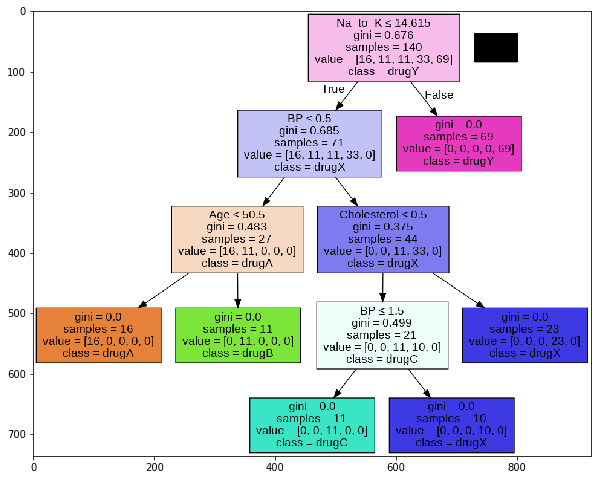

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')

# <h2 id="(c)">(c)</h2>
<p>Copyright &copy; 2019 <b>Evangs Mailoa</b>.</p>

---


<p>Digunakan khusus untuk ngajar Machine Learning di Progdi Teknik Informatika - FTI UKSW</p>